# Load MNIST Dataset of Digital hand writing

In [1]:
#Plot adhoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Print Predicted digits vector
print (y_train)

11493376/11490434 [==============================] - 0s 0us/step
[5 0 4 ... 5 6 8]


In [3]:
print ("X_train - training input size {}".format(X_train.shape))
print ("y_train - training result size {}\n".format(y_train.shape))

print ("X_test - Validation input size {}".format(X_test.shape))
print ("y_test - Validation result size {}".format(y_test.shape))

X_train - training input size (60000, 28, 28)
y_train - training result size (60000,)

X_test - Validation input size (10000, 28, 28)
y_test - Validation result size (10000,)


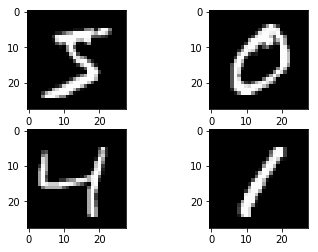

In [4]:
# E.g. Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# Show the plot
plt.show()

# Create a simple Artificial Neural Network for Training

In [5]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [6]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Load Data

In [7]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_trainOrig = X_train
X_testOrig = X_test

# Preprocess Data - Flatten 

In [8]:
# Flatten 28x28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2] # 28 * 28 = 784 pixels
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print ("Training matrix size X_train = {}, test matrix size X_test = {}".format(X_train.shape, X_test.shape))

Training matrix size X_train = (60000, 784), test matrix size X_test = (10000, 784)


# Preprocess Data - Normalize Pixel values

In [9]:
# Normalize inputs from 0-255 to 0-1
print ("Max pixel value before Normalization = {}".format(X_train.max())) # 255 is the max

X_train = X_train / 255
X_test = X_test / 255

print ("Max pixel value post Normalization= {}".format(X_train.max())) # 1 is the max

Max pixel value before Normalization = 255.0
Max pixel value post Normalization= 1.0


# Preprocess Data - Convert Ground truth to One hot encoding

In [10]:
# One hot encode outputs (i.e. convert number into array, i.e. 5 - [0 0 0 0 1 0 0 0 0 0] to handle one vs all)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1] # Now shape is 10000 x 10 as each number is converted as array

print ("Number of classes - {}".format(num_classes))

Number of classes - 10


# Model Creation Class
simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer. 
A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction. 
Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) and the efficient ADAM gradient descent algorithm is used to learn the weights.

In [11]:
# Define the base model
def baseline_model(num_pixels, num_classes):
    # Create Model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation ='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation = 'softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model            

In [12]:
# build the model
model = baseline_model(num_pixels, num_classes)

# Train the Model

In [13]:
%%time
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.2783 - acc: 0.9210 - val_loss: 0.1414 - val_acc: 0.9576
Epoch 2/10
 - 3s - loss: 0.1116 - acc: 0.9676 - val_loss: 0.0924 - val_acc: 0.9706
Epoch 3/10
 - 3s - loss: 0.0718 - acc: 0.9796 - val_loss: 0.0783 - val_acc: 0.9771
Epoch 4/10
 - 3s - loss: 0.0504 - acc: 0.9857 - val_loss: 0.0741 - val_acc: 0.9769
Epoch 5/10
 - 3s - loss: 0.0374 - acc: 0.9892 - val_loss: 0.0668 - val_acc: 0.9795
Epoch 6/10
 - 3s - loss: 0.0270 - acc: 0.9926 - val_loss: 0.0624 - val_acc: 0.9804
Epoch 7/10
 - 3s - loss: 0.0208 - acc: 0.9947 - val_loss: 0.0619 - val_acc: 0.9808
Epoch 8/10
 - 3s - loss: 0.0140 - acc: 0.9970 - val_loss: 0.0644 - val_acc: 0.9797
Epoch 9/10
 - 3s - loss: 0.0107 - acc: 0.9977 - val_loss: 0.0587 - val_acc: 0.9812
Epoch 10/10
 - 3s - loss: 0.0081 - acc: 0.9985 - val_loss: 0.0578 - val_acc: 0.9821
CPU times: user 2min 20s, sys: 1min 11s, total: 3min 31s
Wall time: 27.2 s


# Evaluate the Model against Test Data
Test data and validation is used as the same. But, this should be ideally different

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print (scores)
print ("Baseline Error: %.2f%%" % (100-scores[1]*100))

[0.05781533238754491, 0.9821]
Baseline Error: 1.79%


# Save the Model

In [15]:
model.save("kerasDigitRecognizer.h5")

# Sample Visual Test: Picking one of the inputs from Training data

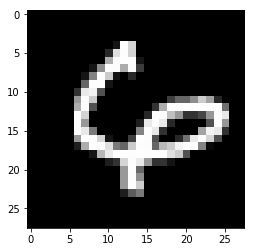

Prediction for the input image is 6


In [16]:
testInput = X_trainOrig[506]
plt.imshow(testInput, cmap=plt.get_cmap('gray'))
plt.show()
# Preprocess - Flatten
nrPixels = testInput.shape[0] * X_train.shape[1] # 28 * 28 = 784 pixels
testInput_processed = testInput.reshape(1, num_pixels).astype('float32')
# Preprocess - Normalization
testInput_processed = testInput_processed/ 255
# Prediction
pred = model.predict(testInput_processed)
print ("Prediction for the input image is {}".format(pred.argmax()))